In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from __future__ import division
import scipy.stats as stats
import seaborn as sns

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a*rng.current + c) % m
    return rng.current/m

# setting the seed
rng.current = 1
[rng() for i in range(10)]

[0.2569,
 0.5879,
 0.1543,
 0.7673,
 0.9738,
 0.5859,
 0.8511,
 0.6132,
 0.7474,
 0.0624]

In [3]:
def expon_pdf(x, lmabd=1):
    """PDF of exponential distribution."""
    return lmabd*np.exp(-lmabd*x)
def expon_cdf(x, lambd=1):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-lambd*x)
def expon_icdf(p, lambd=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/lambd

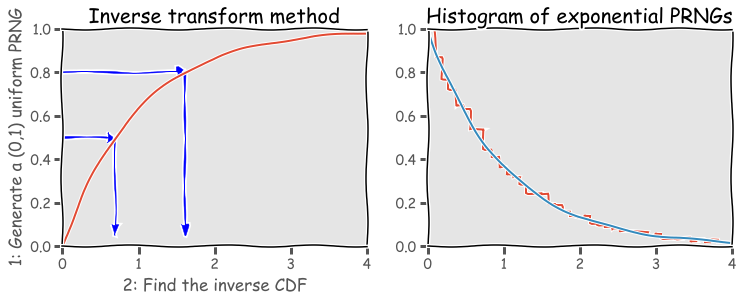

In [5]:
dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

with plt.xkcd():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x, expon_cdf(x))
    plt.axis([0, 4, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
        plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generate a (0,1) uniform PRNG')
    plt.xlabel('2: Find the inverse CDF')
    plt.title('Inverse transform method');

    plt.subplot(122)
    u = np.random.random(10000)
    v = expon_icdf(u)
    plt.hist(v, histtype='step', bins=100, normed=True, linewidth=2)
    plt.plot(x, expon_pdf(x), linewidth=2)
    plt.axis([0,4,0,1])
    plt.title('Histogram of exponential PRNGs');

In [10]:
from scipy.interpolate import interp1d

def extrap1d(interpolator):
    """From StackOverflow http://bit.ly/1BjyRfk"""
    xs = interpolator.x
    ys = interpolator.y

    def pointwise(x):
        if x < xs[0]:
            return ys[0]+(x-xs[0])*(ys[1]-ys[0])/(xs[1]-xs[0])
        elif x > xs[-1]:
            return ys[-1]+(x-xs[-1])*(ys[-1]-ys[-2])/(xs[-1]-xs[-2])
        else:
            return interpolator(x)

    def ufunclike(xs):
        return np.array(map(pointwise, np.array(xs)))

    return ufunclike

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF

# Make up some random data
x = np.concatenate([np.random.normal(0, 1, 10000),
                    np.random.normal(4, 1, 10000)])

ecdf = ECDF(x)
inv_cdf = extrap1d(interp1d(ecdf.y, ecdf.x,
                            bounds_error=False, assume_sorted=True))
r = np.random.uniform(0, 1, 1000)
ys = inv_cdf(r)

plt.hist(x, 25, histtype='step', color='red', normed=True, linewidth=1)
plt.hist(ys, 25, histtype='step', color='blue', normed=True, linewidth=1);

ModuleNotFoundError: No module named 'statsmodels.distributions'